In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import percentile

In [40]:
pluto = pd.read_csv("./processed_data/merged_step3.csv")
pluto.tail()

,bbl,10_bldgclass,10_lotarea,10_bldgarea,10_histdist,10_landmark,10_ownername,11_bldgclass,11_lotarea,11_bldgarea,...,xcoord_x,ycoord_x,dob_permits,dob_A1,dob_A2,dob_A3,dob_NB,dob_DM,dob_ALL,council
982,1022260041,M9,21250,20248,,,NYC SCHOOL CONSTRUCTI,W1,21250,82200,...,1005928.0,254626.0,"[{'job_type': 'DM', 'work_type': 'EQ', 'date':...",0,6,7,12,4,29,10.0
983,1022370018,M1,30120,11072,,,HOLY TRINITY CH OF N,M1,30120,11072,...,1004513.0,254994.0,"[{'job_type': 'A2', 'work_type': 'BL', 'date':...",0,9,1,0,0,10,10.0
984,1022420051,M1,31675,21791,,,RC CH GOOD SHEPHERD,M1,31675,21791,...,1006266.0,255705.0,"[{'job_type': 'A2', 'work_type': 'FB', 'date':...",0,3,8,0,0,11,10.0
985,1022430384,M1,3300,3450,,,R C CH GOOD SHEPHERD,M1,3300,3450,...,1007261.0,257000.0,"[{'job_type': 'A2', 'work_type': 'PL', 'date':...",0,2,0,0,0,2,10.0
986,1022460115,M9,17375,13000,,,CORP/PRESIDING BISHOP,M9,17375,13000,...,1003814.0,254824.0,"[{'job_type': 'NB', 'work_type': None, 'date':...",0,10,0,12,0,22,10.0


In [12]:
#get unique council districts
council_districts = [districts for districts in pluto['council'].unique() if not pd.isna(districts)]
council_districts

[1.0, 2.0, 3.0, 4.0, 6.0, 5.0, 9.0, 8.0, 7.0, 10.0]

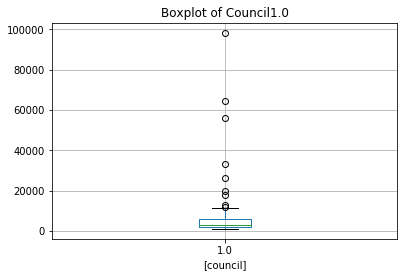

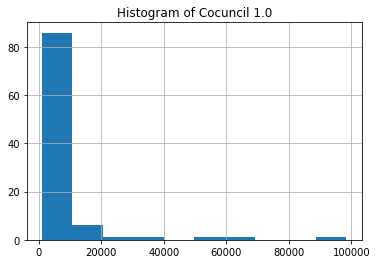

1.0 [ 1682.8 11200. ] 6998.360824742268


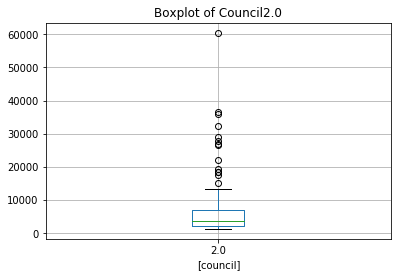

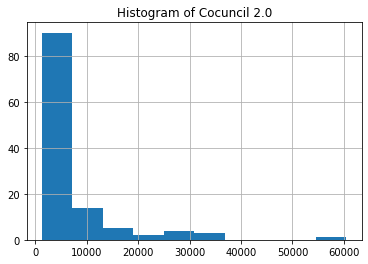

2.0 [ 1905.6 17662.6] 6797.64705882353


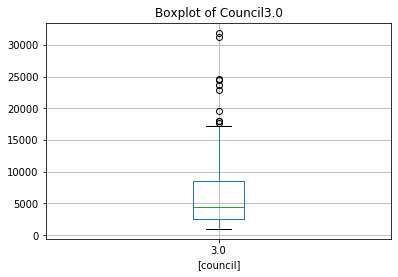

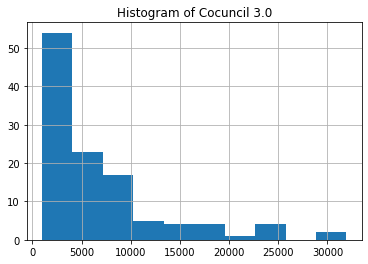

3.0 [ 1988.4 15243.1] 6740.473684210527


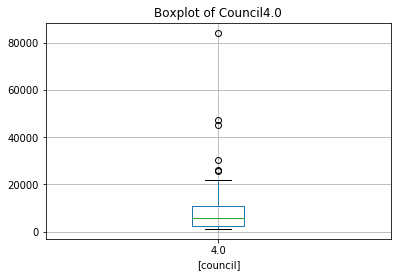

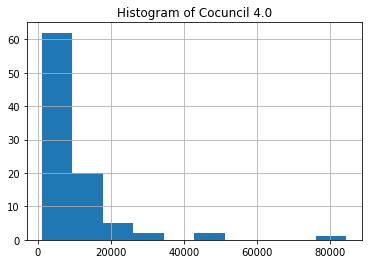

4.0 [ 1934.5 18205.2] 9266.380434782608


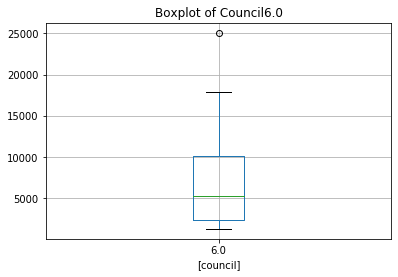

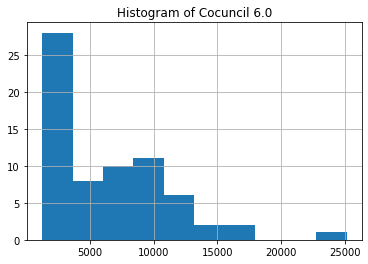

6.0 [ 1872.2 12267. ] 6551.5


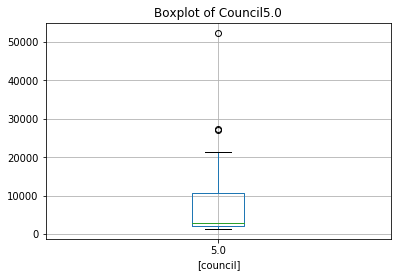

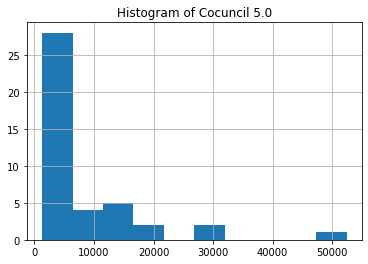

5.0 [ 1560.8 19887.9] 7780.166666666667


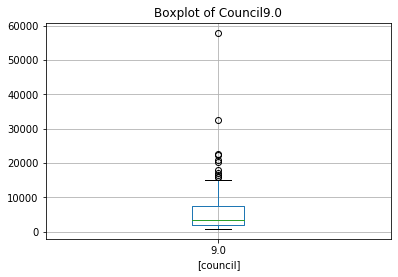

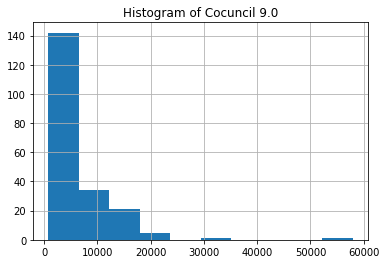

9.0 [ 1647.5 13579. ] 5867.328431372549


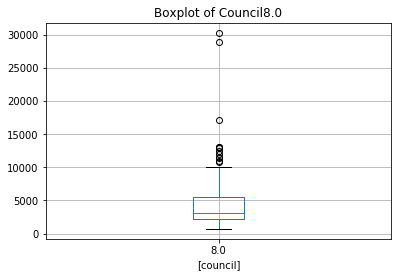

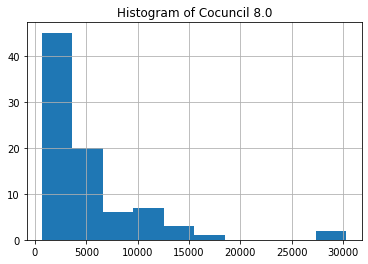

8.0 [ 1539.8 11557.4] 5139.857142857143


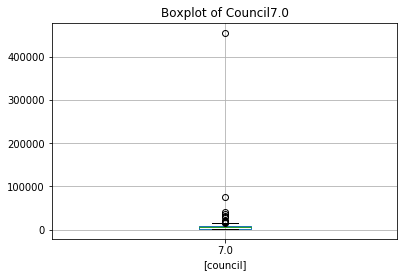

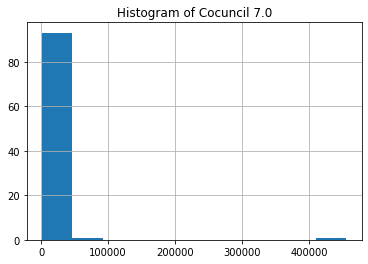

7.0 [ 1893.2 17633. ] 12546.273684210526


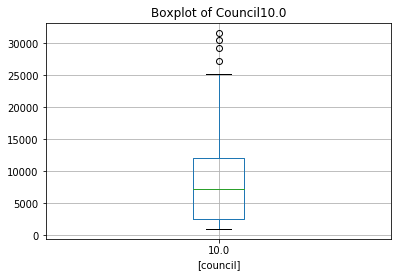

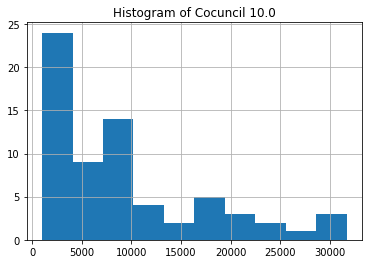

10.0 [ 2287.8 21540. ] 9396.432835820895


In [41]:
outliners_summary = []

for i in council_districts:
    df = pluto[pluto["council"] == i]
    lotarea = pluto[pluto["council"] == i]["20_lotarea"]
    quartiles = percentile(lotarea, [10, 90])
    mean = df["20_lotarea"].mean()
    std = df["20_lotarea"].std()
    outliners = [quartiles[0],quartiles[1]]
    
    #box plot
    df.boxplot(column = ['20_lotarea'], by = ['council'])
    plt.title("Boxplot of Council" + str(i))
    plt.suptitle("")
    
    #hist plot
    df.hist('20_lotarea')
    plt.title("Histogram of Cocuncil " + str(i))
    plt.show()
    
    print(i, quartiles, mean)
    #add outliners to summary list
    filtered = df[(df["20_lotarea"] > outliners[1]) | (df["20_lotarea"] < outliners[0])]['bbl']
    outliners_summary.append(filtered)

In [44]:
#combine all outliners into a single DataFrame
cd_outliners = pd.concat(outliners_summary)

In [47]:
cd_outliners.size

206